## 이미지 준비

In [1]:
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
import matplotlib.pyplot as plt

5


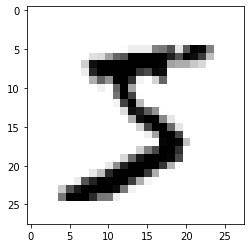

In [10]:
i = 0
plt.imshow(x_train[i], cmap='binary')
print(y_train[i])

In [11]:
x_train, x_test = x_train / 255.0, x_test / 255.0

## 모형 만들기

In [18]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [19]:
predictions = model(x_train[:1]).numpy()
predictions

array([[0.20072813, 0.05522707, 0.04711994, 0.05855568, 0.15157422,
        0.0429402 , 0.11962635, 0.10132173, 0.12446129, 0.09844539]],
      dtype=float32)

## 학습

In [20]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3018 - accuracy: 0.9124
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1420 - accuracy: 0.9576
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1079 - accuracy: 0.9668
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0886 - accuracy: 0.9724
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0775 - accuracy: 0.9758


## 평가

In [48]:
predictions = model(x_train[:1]).numpy()
predictions

array([[9.7115760e-11, 4.1219677e-09, 6.5395733e-07, 5.0348923e-02,
        1.5436347e-16, 9.4965035e-01, 5.2055067e-14, 5.9813656e-09,
        1.2909955e-12, 6.0908881e-08]], dtype=float32)

In [22]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.0750 - accuracy: 0.9774


[0.07496492564678192, 0.977400004863739]

## 직접 업로드해서 인식시켜보기

In [23]:
import PIL.Image

In [49]:
img = PIL.Image.open('number.png')

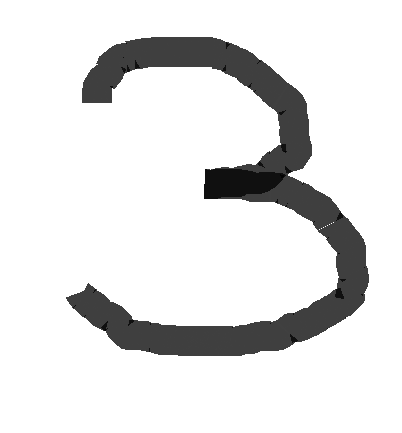

In [50]:
img

In [55]:
import numpy as np
x = 1 - np.array(img.convert('L').resize((28, 28)), dtype='float32') / 255

In [56]:
x = np.expand_dims(x, 0)

In [57]:
model.predict(x)

array([[1.4819477e-06, 6.1660944e-03, 3.6163852e-01, 6.3105679e-01,
        4.4947175e-12, 1.1281443e-03, 5.4436896e-06, 3.1824985e-09,
        3.5236842e-06, 6.1501422e-11]], dtype=float32)